In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [2]:
# use pandas to import csv file
df = pd.read_csv("churn3.csv")
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

,customer_id,age,gender,dependents,occupation,city,customer_nw_category,branch_code,churn
0,1,66,1.0,0.0,1.0,187.0,2,755,0
1,2,35,1.0,0.0,1.0,NaN,2,3214,0
2,4,31,1.0,0.0,0.0,146.0,2,41,0
3,5,90,NaN,NaN,1.0,1020.0,2,582,1
4,6,42,1.0,2.0,1.0,1494.0,3,388,1
...,...,...,...,...,...,...,...,...,...
28377,30297,10,0.0,0.0,2.0,1020.0,2,1207,0
28378,30298,34,0.0,0.0,1.0,1046.0,2,223,0
28379,30299,47,1.0,0.0,0.0,1096.0,2,588,1
28380,30300,50,1.0,3.0,1.0,1219.0,3,274,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           28382 non-null  int64  
 1   age                   28382 non-null  int64  
 2   gender                27857 non-null  float64
 3   dependents            25919 non-null  float64
 4   occupation            28302 non-null  float64
 5   city                  27579 non-null  float64
 6   customer_nw_category  28382 non-null  int64  
 7   branch_code           28382 non-null  int64  
 8   churn                 28382 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.9 MB


In [5]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

customer_id                0
age                        0
gender                   525
dependents              2463
occupation                80
city                     803
customer_nw_category       0
branch_code                0
churn                      0
dtype: int64
Missing values distribution: 
customer_id             0.000000
age                     0.000000
gender                  0.018498
dependents              0.086780
occupation              0.002819
city                    0.028293
customer_nw_category    0.000000
branch_code             0.000000
churn                   0.000000
dtype: float64


In [9]:
# Replace missing values with the mean of the column
mean_value = df['city'].mean()
df['city'].fillna(mean_value, inplace=True)

In [10]:
# Replace missing values with the mode of the column
mode_value = df['gender'].mode()[0]
df['gender'].fillna(mode_value, inplace=True)

In [11]:
# Replace missing values with the mode of the column
mode_value = df['occupation'].mode()[0]
df['occupation'].fillna(mode_value, inplace=True)

In [12]:
# Replace missing values with the mode of the column
mode_value = df['dependents'].mode()[0]
df['dependents'].fillna(mode_value, inplace=True)

In [13]:
df

,customer_id,age,gender,dependents,occupation,city,customer_nw_category,branch_code,churn
0,1,66,1.0,0.0,1.0,187.000000,2,755,0
1,2,35,1.0,0.0,1.0,796.109576,2,3214,0
2,4,31,1.0,0.0,0.0,146.000000,2,41,0
3,5,90,1.0,0.0,1.0,1020.000000,2,582,1
4,6,42,1.0,2.0,1.0,1494.000000,3,388,1
...,...,...,...,...,...,...,...,...,...
28377,30297,10,0.0,0.0,2.0,1020.000000,2,1207,0
28378,30298,34,0.0,0.0,1.0,1046.000000,2,223,0
28379,30299,47,1.0,0.0,0.0,1096.000000,2,588,1
28380,30300,50,1.0,3.0,1.0,1219.000000,3,274,0


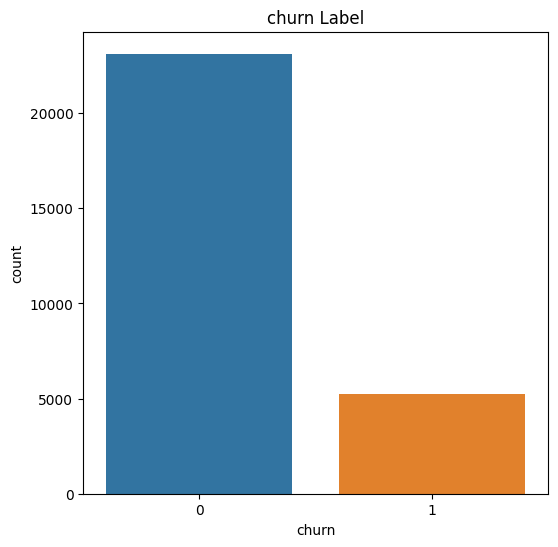

In [15]:
df.churn.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='churn', data=new_df)
plt.title('churn Label')
plt.show()

In [16]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [17]:
from sklearn.model_selection import train_test_split
# split into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
#KNN classifer
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
#Accuracy and Confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, model.predict(X_test))) 
cm

0.98


array([[ 10,   5],
       [  0, 235]], dtype=int64)

In [20]:
#Naive Bayes Classifier
x = df.drop(["churn"], axis = 1)
y = df.churn.values
from sklearn.model_selection import train_test_split
  
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.8124486200822079


In [34]:
#split dataset in features and target variable
feature_cols = ['dependents', 'gender', 'occupation','customer_nw_category']
X = df[feature_cols] # Features
y = df['churn'] # Target variable

In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [37]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8153954553461336
